# Biased Data

While working on this particular dataset, I came across a situation of Data Biaseness.
What is a Biased Data? <br>
--> Basically Statistical bias is a term used to describe statistics that don't provide an accurate representation of the population. Some data is flawed because the sample of people it surveys doesn't accurately represent the population.<br>
For example in this case, the target variable is Binary(0,1); But in the dataset of 58592 entries, <br>
0 --> 54844 <br>
1 --> 3748 <br>
This shows that data is biased towards zeros<br>

So what if the data is biased?<br>
--> If the data is biased the ML algorithm predictions will be dominated by the majority class objects and consequently the minority class is neglected.<br>
In this dataset the majority class is zero, so no matter which algorithm you use-It is going to predict zero for any record.<br>

But the key thing in such datasets is that the minority class is the most important one from the business perspective.<br>

So how to handle this situation?<br>
--> There are multiple methods to tackle data biaseness
Some of them are<br>
    1. Undersampling the majority class<br>
    2. Oversampling the minority class<br>
    3. SMOTE - Synthetic Minority Oversampling Technique<br>
    4. Use of ensemble for undersampling<br>
    
I tried to implement all these methods below.

## Importing Dependencies

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [31]:
df = pd.read_csv('train.csv')

## Quick EDA

In [32]:
df.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   policy_tenure                     58592 non-null  float64
 2   age_of_car                        58592 non-null  float64
 3   age_of_policyholder               58592 non-null  float64
 4   area_cluster                      58592 non-null  object 
 5   population_density                58592 non-null  int64  
 6   make                              58592 non-null  int64  
 7   segment                           58592 non-null  object 
 8   model                             58592 non-null  object 
 9   fuel_type                         58592 non-null  object 
 10  max_torque                        58592 non-null  object 
 11  max_power                         58592 non-null  object 
 12  engi

In [34]:
#Checking for Null values
df.isnull().sum()

policy_id                           0
policy_tenure                       0
age_of_car                          0
age_of_policyholder                 0
area_cluster                        0
population_density                  0
make                                0
segment                             0
model                               0
fuel_type                           0
max_torque                          0
max_power                           0
engine_type                         0
airbags                             0
is_esc                              0
is_adjustable_steering              0
is_tpms                             0
is_parking_sensors                  0
is_parking_camera                   0
rear_brakes_type                    0
displacement                        0
cylinder                            0
transmission_type                   0
gear_box                            0
steering_type                       0
turning_radius                      0
length      

### Checking for Correlated features

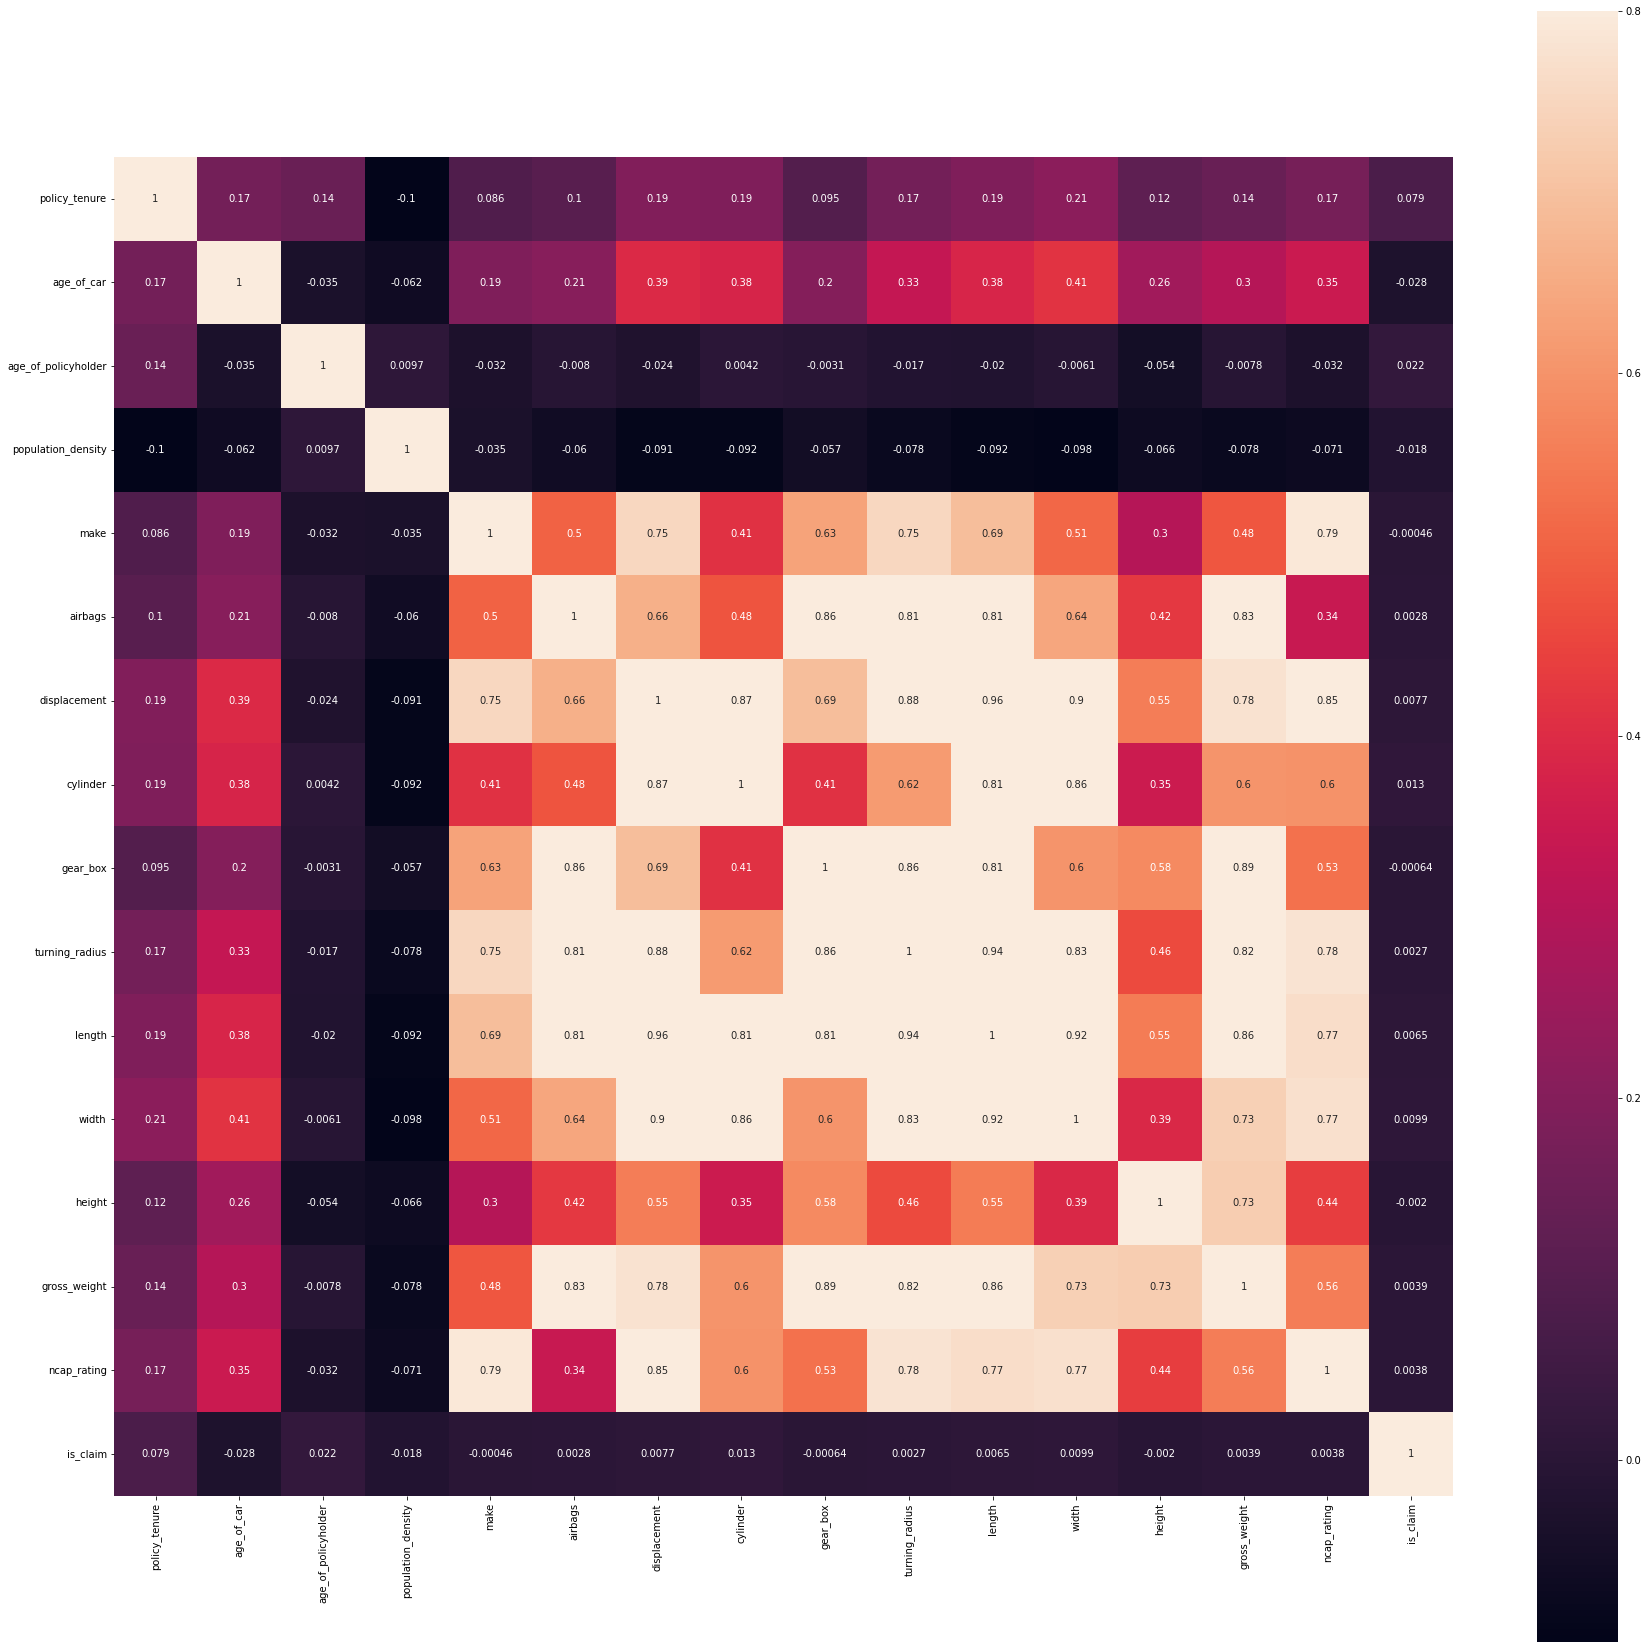

In [7]:
corrmat = df.corr()
plt.figure(figsize=(30,30))
sns.heatmap(corrmat, vmax=.8, square=True,annot=True);

#### Correlated Features

In [8]:
# displacement - make  0.75
# displacement - cylinder 0.87
# gear_box - airbags 0.86
# turningradius - make 0.75
# turning_radius - airbags 0.81
# turning_radius - displacement 0.88
# turning_radius - gear_box 0.86
# length - airbags 0.81
# length - displacement 0.96
# length - cylinder 0.81
# length - gear_box 0.81
# length - turning_radius 0.94
# width - displacement 0.90
# width - cylinder 0.86
# width - turning_radius 0.83
# width - length 0.92
# gross_weight - airbags 0.83
# gross_weight - displacement 0.78
# gross_weight - gear_box 0.89
# gross_weight - turning_radius 0.82
# gross_weight - length 0.86
# ncap_rating - make 0.79
# ncap_rating - displacement 0.85
# ncap_rating - turning_radius 0.78
# ncap_rating - length 0.77
# ncap_rating - width 0.77

#### Conclusions

- Columns to keep <br>
displacement,
airbags

- Columns to drop <br>
make,
cylinder,
gear_box,
turning_radius,
length,
width,
gross_weight,
ncap_rating




### Pandas Profiling

- Commented due to github issue

In [1]:
# from pandas_profiling import ProfileReport
# profile = ProfileReport(df)
# profile.to_notebook_iframe()

### Preprocessing

In [35]:
def preprocessing(df):
    #Dropping Correleted Features
    df.drop(['make', 'cylinder', 'gear_box', 'turning_radius', 'length', 'width', 'gross_weight', 'ncap_rating'],axis=1,inplace=True)
    #Dropping High Cardinality,Unneccesary Columns
    df.drop('policy_id',axis=1,inplace=True)
    df['airbags'] = df['airbags'].astype(str)
    df['displacement'] = df['displacement'].astype(str)
    df['height'] = df['height'].astype(str)

In [99]:
df_copy = df.copy()
preprocessing(df_copy)

In [100]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 35 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_tenure                     58592 non-null  float64
 1   age_of_car                        58592 non-null  float64
 2   age_of_policyholder               58592 non-null  float64
 3   area_cluster                      58592 non-null  object 
 4   population_density                58592 non-null  int64  
 5   segment                           58592 non-null  object 
 6   model                             58592 non-null  object 
 7   fuel_type                         58592 non-null  object 
 8   max_torque                        58592 non-null  object 
 9   max_power                         58592 non-null  object 
 10  engine_type                       58592 non-null  object 
 11  airbags                           58592 non-null  object 
 12  is_e

### Feature and Target Selection

In [101]:
X = df_copy.drop('is_claim',axis=1)
y = df_copy['is_claim']

In [140]:
y.value_counts()

0    54844
1     3748
Name: is_claim, dtype: int64

### Column Transformer

In [102]:
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [103]:
#Seperating Categorical Features
categorical_features = X.select_dtypes('object').columns
categorical_pipeline = Pipeline([('onehot', OneHotEncoder())])

In [104]:
categorical_features

Index(['area_cluster', 'segment', 'model', 'fuel_type', 'max_torque',
       'max_power', 'engine_type', 'airbags', 'is_esc',
       'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'rear_brakes_type', 'displacement',
       'transmission_type', 'steering_type', 'height', 'is_front_fog_lights',
       'is_rear_window_wiper', 'is_rear_window_washer',
       'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks',
       'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert'],
      dtype='object')

In [105]:
#Seperating Numerical Features
numeric_features = ['population_density']
numeric_pipeline = Pipeline([('scaler', StandardScaler())])

In [106]:
#Column Transformer
transformer = ColumnTransformer([('numeric_preprocessing', numeric_pipeline, numeric_features), 
                                 ('categorical_preprocessing', categorical_pipeline, categorical_features)])

### Creating ML-Pipeline

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [45]:
ml_pipeline = Pipeline([('all_column_preprocessing', transformer), ('randomforest', RandomForestClassifier())])

### Train Test Split

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

## Model Training

In [48]:
ml_pipeline.fit(x_train, y_train)

Pipeline(steps=[('all_column_preprocessing',
                 ColumnTransformer(transformers=[('numeric_preprocessing',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['population_density']),
                                                 ('categorical_preprocessing',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder())]),
                                                  Index(['area_cluster', 'segment', 'model', 'fuel_type', 'max_torque',
       'max_power', 'engine_type', 'airbags', 'is_...
       'transmission_type', 'steering_type', 'height', 'is_front_fog_lights',
       'is_rear_window_wiper', 'is_rear_window_washer',
       'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks',
       'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert'],
      dtype='object'))])),
                ('randomforest', RandomForestClassifier())])

### Predictions

In [49]:
pred = ml_pipeline.predict(x_test)
np.unique(pred)

array([0], dtype=int64)

### Confusion Matrix

In [50]:
from sklearn.metrics import confusion_matrix
print (confusion_matrix(y_test, pred))

[[16417     0]
 [ 1161     0]]


### Accuracy

In [51]:
from sklearn import metrics
print(metrics.accuracy_score(y_test,pred))

0.9339515303219934


### Evaluate Performance on Test Partition

In [52]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [53]:
# Evaluate Performance of the Model
accuracy = accuracy_score(y_test,pred)
precision = precision_score(y_test,pred)
recall = recall_score(y_test,pred)
print(f'Metrics for Decison Tree : accuracy- {accuracy}, recall- {recall}, precision- {precision}')

Metrics for Decison Tree : accuracy- 0.9339515303219934, recall- 0.0, precision- 0.0


D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


- Accuracy is very great but Recall and Precision are just terrible

## Insights and Problems

- The Target variable is highly biased towards zero
- So the model gets overfitted towards the majority class zero and ones are completely ignored
- This we can clearly see from Performance Matrix in which accuracy is great but recall and precision is very poor
- This problem can be solved by 
        1. Undersampling the majority class
        2. Oversampling the minority class
        3. SMOTE - Synthetic Minority Oversampling Technique
        4. Use of ensemble for undersampling



## Reducing Data Biaseness

### 1. UnderSampling the Majority Class

In [55]:
y_test.value_counts()

0    16417
1     1161
Name: is_claim, dtype: int64

In [56]:
# Class Counts
count_class_0, count_class_1 = df_copy.is_claim.value_counts()

# Divide by Class
df_class_0 = df_copy[df_copy['is_claim'] == 0]
df_class_1 = df_copy[df_copy['is_claim'] == 1]

In [57]:
count_class_0, count_class_1

(54844, 3748)

In [58]:
df_class_0.shape

(54844, 35)

In [59]:
df_class_1.shape

(3748, 35)

In [60]:
#Randomly Sampling Class0 data equal to class1 data
df_class_0_usample = df_class_0.sample(count_class_1)

In [61]:
undersampled_df = pd.concat([df_class_0_usample, df_class_1],axis=0)

In [62]:
undersampled_df.shape

(7496, 35)

In [63]:
undersampled_df.is_claim.value_counts()

0    3748
1    3748
Name: is_claim, dtype: int64

### Seperating Feature and Target Columns

In [64]:
X = undersampled_df.drop('is_claim',axis=1)
y = undersampled_df['is_claim']

In [65]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42, stratify=y)

In [66]:
y_train.value_counts()

1    2624
0    2623
Name: is_claim, dtype: int64

## Model Training

In [67]:
ml_pipeline.fit(x_train, y_train)

Pipeline(steps=[('all_column_preprocessing',
                 ColumnTransformer(transformers=[('numeric_preprocessing',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['population_density']),
                                                 ('categorical_preprocessing',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder())]),
                                                  Index(['area_cluster', 'segment', 'model', 'fuel_type', 'max_torque',
       'max_power', 'engine_type', 'airbags', 'is_...
       'transmission_type', 'steering_type', 'height', 'is_front_fog_lights',
       'is_rear_window_wiper', 'is_rear_window_washer',
       'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks',
       'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert'],
      dtype='object'))])),
                ('randomforest', RandomForestClassifier())])

## Predictions

In [68]:
pred = ml_pipeline.predict(x_test)

## Confusion Matrix

In [69]:
print (confusion_matrix(y_test, pred))

[[415 710]
 [367 757]]


In [70]:
# Evaluate Performance of the Model
accuracy = accuracy_score(y_test,pred)
precision = precision_score(y_test,pred)
recall = recall_score(y_test,pred)
print(f'Metrics for Decison Tree : accuracy- {accuracy}, recall- {recall}, precision- {precision}')

Metrics for Decison Tree : accuracy- 0.5211204979991108, recall- 0.6734875444839857, precision- 0.5160190865712339


### 2. Oversampling the Minority Class

In [71]:
count_class_0, count_class_1

(54844, 3748)

In [72]:
# Class Counts
count_class_0, count_class_1 = df_copy.is_claim.value_counts()

# Divide by Class
df_class_0 = df_copy[df_copy['is_claim'] == 0]
df_class_1 = df_copy[df_copy['is_claim'] == 1]

In [73]:
#Randomly Sampling Class1 data equal to class2 data with 'Random Sampling with Replacement'
df_class_1_oversample = df_class_1.sample(count_class_0,replace=True)

In [74]:
Oversampled_df = pd.concat([df_class_0, df_class_1_oversample ],axis=0)

In [75]:
Oversampled_df.shape

(109688, 35)

#### Feature and Target Selection

In [76]:
X = Oversampled_df.drop('is_claim',axis=1)
y = Oversampled_df['is_claim']

#### Train Test SPlit

In [77]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42, stratify=y)

#### Model Training

In [78]:
ml_pipeline.fit(x_train, y_train)

Pipeline(steps=[('all_column_preprocessing',
                 ColumnTransformer(transformers=[('numeric_preprocessing',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['population_density']),
                                                 ('categorical_preprocessing',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder())]),
                                                  Index(['area_cluster', 'segment', 'model', 'fuel_type', 'max_torque',
       'max_power', 'engine_type', 'airbags', 'is_...
       'transmission_type', 'steering_type', 'height', 'is_front_fog_lights',
       'is_rear_window_wiper', 'is_rear_window_washer',
       'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks',
       'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert'],
      dtype='object'))])),
                ('randomforest', RandomForestClassifier())])

#### Prediction

In [79]:
pred = ml_pipeline.predict(x_test)

#### Confusion Matrix

In [80]:
print (confusion_matrix(y_test, pred))

[[ 8207  8247]
 [ 6288 10165]]


In [158]:
from sklearn.metrics import classification_report
print (classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.57      0.50      0.53     16454
           1       0.55      0.62      0.58     16453

    accuracy                           0.56     32907
   macro avg       0.56      0.56      0.56     32907
weighted avg       0.56      0.56      0.56     32907



### 3. SMOTE

- Read about SMOTE <br>
https://www.geeksforgeeks.org/ml-handling-imbalanced-data-with-smote-and-near-miss-algorithm-in-python/#:~:text=SMOTE%20(synthetic%20minority%20oversampling%20technique)%20is%20one%20of%20the%20most,instances%20between%20existing%20minority%20instances.

In [81]:
X = df_copy.drop('is_claim',axis=1)
y = df_copy['is_claim']

#### Dependencies

In [82]:
from imblearn.over_sampling import SMOTE

In [144]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# onehot = OneHotEncoder()
# X = scaler.fit_transform(X)
X = pd.get_dummies(X)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Columns: 139 entries, policy_tenure to is_speed_alert_Yes
dtypes: float64(3), int64(1), uint8(135)
memory usage: 9.3 MB


In [145]:
X.head()

,policy_tenure,age_of_car,age_of_policyholder,population_density,area_cluster_C1,area_cluster_C10,area_cluster_C11,area_cluster_C12,area_cluster_C13,area_cluster_C14,...,is_power_steering_No,is_power_steering_Yes,is_driver_seat_height_adjustable_No,is_driver_seat_height_adjustable_Yes,is_day_night_rear_view_mirror_No,is_day_night_rear_view_mirror_Yes,is_ecw_No,is_ecw_Yes,is_speed_alert_No,is_speed_alert_Yes
0,0.515874,0.05,0.644231,4990,1,0,0,0,0,0,...,0,1,1,0,1,0,1,0,0,1
1,0.672619,0.02,0.375000,27003,0,0,0,0,0,0,...,0,1,1,0,1,0,1,0,0,1
2,0.841110,0.02,0.384615,4076,0,0,0,0,0,0,...,0,1,1,0,1,0,1,0,0,1
3,0.900277,0.11,0.432692,21622,0,0,0,0,0,0,...,0,1,0,1,0,1,0,1,0,1
4,0.596403,0.11,0.634615,34738,0,0,0,0,0,0,...,0,1,1,0,0,1,0,1,0,1


In [146]:
y.value_counts()

0    54844
1     3748
Name: is_claim, dtype: int64

In [147]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

y_sm.value_counts()

0    54844
1    54844
Name: is_claim, dtype: int64

In [149]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_sm,y_sm,test_size=0.3,random_state=42, stratify=y_sm)

In [154]:
x_train.shape

(76781, 139)

In [155]:
y_train.shape

(76781,)

### Modelling

In [156]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)

from sklearn.metrics import confusion_matrix
print (confusion_matrix(y_test, y_pred))

[[14712  1742]
 [ 1492 14961]]


In [157]:
from sklearn.metrics import classification_report
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90     16454
           1       0.90      0.91      0.90     16453

    accuracy                           0.90     32907
   macro avg       0.90      0.90      0.90     32907
weighted avg       0.90      0.90      0.90     32907



### SMOTE Gave the best results so far

## 4. Use of Ensemble with undersampling

In [117]:
X = df_copy.drop('is_claim',axis=1)
y = df_copy['is_claim']

In [119]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [120]:
y_train.value_counts()

0    43875
1     2998
Name: is_claim, dtype: int64

#### Methodology

- Now we divide the majority class data into smaller units in multiple of minority class data
that is  <br>
dataset(2998 records of class 0) * 10 such datasets

- Then we make 10 Models 
- On the basis of these 10 models we give final prediction by voting

In [121]:
df3 = X_train.copy()
df3['is_claim'] = y_train

In [122]:
df3.head()

,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,segment,model,fuel_type,max_torque,max_power,...,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,is_claim
14804,0.030762,0.02,0.442308,C10,73430,C1,M9,Diesel,200Nm@1750rpm,97.89bhp@3600rpm,...,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,0
30685,1.178656,0.04,0.509615,C8,8794,C2,M4,Diesel,250Nm@2750rpm,113.45bhp@4000rpm,...,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,0
9318,1.181232,0.16,0.326923,C8,8794,C2,M4,Diesel,250Nm@2750rpm,113.45bhp@4000rpm,...,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,0
42670,0.659098,0.08,0.346154,C3,4076,C2,M4,Diesel,250Nm@2750rpm,113.45bhp@4000rpm,...,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,1
24639,1.145952,0.14,0.461538,C2,27003,B2,M6,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,1


In [123]:
df3_class0 = df3[df3.is_claim==0]
df3_class1 = df3[df3.is_claim==1]

In [124]:
#Function to create 10 desired datasets
def get_train_batch(df_majority, df_minority, start, end):
    df_train = pd.concat([df_majority[start:end], df_minority], axis=0)

    X_train = df_train.drop('is_claim', axis='columns')
    y_train = df_train.is_claim
    return X_train, y_train 

### Model-1

In [125]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 0, 2998)
ml_pipeline.fit(X_train, y_train)
y_pred1 = ml_pipeline.predict(X_test)

In [126]:
from sklearn.metrics import confusion_matrix
print (confusion_matrix(y_test, y_pred1))

[[6149 4820]
 [ 387  363]]


### Model-2

In [127]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 2998, 5996)
ml_pipeline.fit(X_train, y_train)
y_pred2 = ml_pipeline.predict(X_test)

from sklearn.metrics import confusion_matrix
print (confusion_matrix(y_test, y_pred2))

[[4791 6178]
 [ 292  458]]


### Model-3

In [128]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 5996, 8994)
ml_pipeline.fit(X_train, y_train)
y_pred3 = ml_pipeline.predict(X_test)

from sklearn.metrics import confusion_matrix
print (confusion_matrix(y_test, y_pred3))

[[5804 5165]
 [ 348  402]]


### Model-4

In [129]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 8994, 11992)
ml_pipeline.fit(X_train, y_train)
y_pred4 = ml_pipeline.predict(X_test)
from sklearn.metrics import confusion_matrix
print (confusion_matrix(y_test, y_pred4))

[[4290 6679]
 [ 265  485]]


### Model-5

In [130]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 11992, 14990)
ml_pipeline.fit(X_train, y_train)
y_pred5 = ml_pipeline.predict(X_test)

from sklearn.metrics import confusion_matrix
print (confusion_matrix(y_test, y_pred5))

[[4814 6155]
 [ 291  459]]


### Model-6

In [131]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 14990, 17988)
ml_pipeline.fit(X_train, y_train)
y_pred6 = ml_pipeline.predict(X_test)

from sklearn.metrics import confusion_matrix
print (confusion_matrix(y_test, y_pred6))

[[4818 6151]
 [ 289  461]]


### Model-7

In [132]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 17988, 20986)
ml_pipeline.fit(X_train, y_train)
y_pred7 = ml_pipeline.predict(X_test)

from sklearn.metrics import confusion_matrix
print (confusion_matrix(y_test, y_pred7))

[[5006 5963]
 [ 324  426]]


### Model-8

In [133]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 20986, 23984)
ml_pipeline.fit(X_train, y_train)
y_pred8 = ml_pipeline.predict(X_test)

from sklearn.metrics import confusion_matrix
print (confusion_matrix(y_test, y_pred8))

[[4539 6430]
 [ 263  487]]


### Model-9

In [134]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 23984, 26982)
ml_pipeline.fit(X_train, y_train)
y_pred9 = ml_pipeline.predict(X_test)

from sklearn.metrics import confusion_matrix
print (confusion_matrix(y_test, y_pred9))

[[4060 6909]
 [ 276  474]]


### Model-10

In [135]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 26982, 29980)
ml_pipeline.fit(X_train, y_train)
y_pred10 = ml_pipeline.predict(X_test)

from sklearn.metrics import confusion_matrix
print (confusion_matrix(y_test, y_pred10))

[[5239 5730]
 [ 339  411]]


### Final Prediction based on voting

In [136]:
y_pred_final = y_pred1.copy()
for i in range(len(y_pred1)):
    n_ones = y_pred1[i] + y_pred2[i] + y_pred3[i] + y_pred4[i] + y_pred5[i] + y_pred6[i] + y_pred7[i] + y_pred8[i] + y_pred9[i] + y_pred10[i]
    if n_ones>5:
        y_pred_final[i] = 1
    else:
        y_pred_final[i] = 0

### Evaluation

In [139]:
print (confusion_matrix(y_test, y_pred_final))

[[5906 5063]
 [ 356  394]]


In [138]:
from sklearn.metrics import confusion_matrix , classification_report
cl_rep = classification_report(y_test, y_pred_final)
print(cl_rep)

              precision    recall  f1-score   support

           0       0.94      0.54      0.69     10969
           1       0.07      0.53      0.13       750

    accuracy                           0.54     11719
   macro avg       0.51      0.53      0.41     11719
weighted avg       0.89      0.54      0.65     11719



### SMOTE - The Saviour

For this particular dataset, SMOTE performed very well.
But this may not the case for all the datasets.
So keep exploring various ways to handle biased datasets....

# Final Conclusion

Machine Learning is an creative field. Nothing is certain in this field.
You have to try different methods and approaches to get optimed solution to problems.
Happy Exploring!